In [1]:
import json
import sys
import os

sys.path.insert(0, f"{sys.path[0]}/src")

from etl import *
from run import *

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
params = json.load(open("config/params.json"))

In [4]:
params

{'references': '/datasets/dsc180a-wi20-public/Genome/resources/hg38/',
 'new_ref_location': 'references',
 'chromosomes': [0, '-', 2, 21, '-', 22],
 'outpath': ['results'],
 'directory': '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr',
 'extension': '.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
 'chromosome_links': ['ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG00096/sequence_read/SRR062635.filt.fastq.gz',
  'ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG00097/sequence_read/SRR765989.filt.fastq.gz',
  'ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG00100/sequence_read/SRR099966.filt.fastq.gz'],
 'test_fastq': '/datasets/dsc180a-wi20-public/Genome/fastq/testfile/SP1.fq',
 'bam_name': 'sample.bam',
 'vcf_name': 'sample.vcf',
 'conversion_dir': 'data/converted',
 'keep_filtered': 0,
 'fil_output': 'vcf',
 'merged_vcf': 'merged.vcf',
 'vcf_dir': 'data/vcf_loc',
 'maf': 0.3,
 'geno': 0.4,
 'mind': 0.3,
 'eigen_file': 'eigens',
 'picture_name': 'pca.

In [6]:
directory = params['directory']
extension = params['extension']
vcf_dir = params['vcf_dir']

# Filtering First on all 22

In [5]:
############ WARNING TAKES AN HOUR TO RUN
chrom_lst = get_chrom_list([0, '-', 22])

vcf_lst = [f'{directory}{chrom}{extension}' for chrom in chrom_lst]

for ind, vcf in enumerate(vcf_lst):
    filtering_vcf(vcf, chrom_lst[ind], vcf_dir, params['maf'],
               params['geno'], params['mind'], params['fil_output'],
               keep_files = bool(params['keep_filtered']))

# Chromosomes 1-3

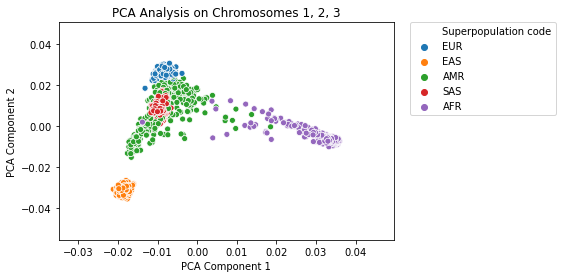

In [7]:
################ WARNING TAKES 30 MIN TO RUN
######## vcf analysis
chrom_lst = get_chrom_list([0, '-', 3])

zipped_lst = [f"{chrom}.vcf.gz" for chrom in chrom_lst] ## gives vcf file names
vcf_concat(zipped_lst, "1_3.vcf", vcf_dir) ### combines vcfs 

### performs pca on chosen vcfs
pca("1_3.vcf", params['fil_output'], "1_3", vcf_dir)

### plots pca clusters based on the chosen chromosomes (given by chrom_lst)
eigen_file = vcf_dir + '/' + "1_3" + '.eigenvec'
plot_clusters(eigen_file, chrom_lst)

# Chromosomes 1-2, 21-22

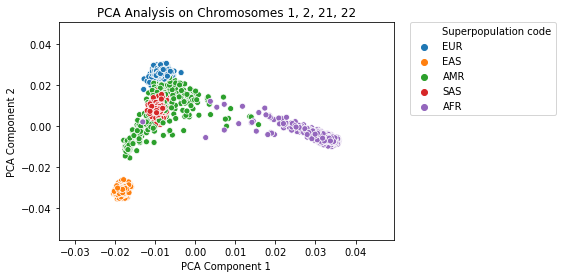

In [8]:
############## WARNING TAKES 30 MIN TO RUN
######## vcf analysis
chrom_lst = get_chrom_list([0, '-', 2, 21,22])

zipped_lst = [f"{chrom}.vcf.gz" for chrom in chrom_lst] ## gives vcf file names
vcf_concat(zipped_lst, "1_2_21_22.vcf", vcf_dir) ### combines vcfs 

### performs pca on chosen vcfs
pca("1_2_21_22.vcf", params['fil_output'], "1_2_21_22", vcf_dir)

### plots pca clusters based on the chosen chromosomes (given by chrom_lst)
eigen_file = vcf_dir + '/' + "1_2_21_22" + '.eigenvec'
plot_clusters(eigen_file, chrom_lst)

# Chromosome 19-22

In [ ]:
################## WARNING TAKES 20 MIN TO RUN
######## vcf analysis
chrom_lst = get_chrom_list([19, '-', 22])

zipped_lst = [f"{chrom}.vcf.gz" for chrom in chrom_lst] ## gives vcf file names
vcf_concat(zipped_lst, "19_22.vcf", vcf_dir) ### combines vcfs 

### performs pca on chosen vcfs
pca("19_22.vcf", params['fil_output'], "19_22", vcf_dir)

### plots pca clusters based on the chosen chromosomes (given by chrom_lst)
eigen_file = vcf_dir + '/' + "19_22" + '.eigenvec'
plot_clusters(eigen_file, chrom_lst)

# Chromosome 1-22

In [ ]:
############### WARNING TAKES AN HOUR TO RUN
######## vcf analysis
chrom_lst = get_chrom_list([0, '-', 22])

zipped_lst = [f"{chrom}.vcf.gz" for chrom in chrom_lst] ## gives vcf file names
vcf_concat(zipped_lst, "1_22.vcf", vcf_dir) ### combines vcfs 

### performs pca on chosen vcfs
pca("1_22.vcf", params['fil_output'], "1_22", vcf_dir)

### plots pca clusters based on the chosen chromosomes (given by chrom_lst)
eigen_file = vcf_dir + '/' + "1_22" + '.eigenvec'
plot_clusters(eigen_file, chrom_lst)